In [30]:
import pandas as pd
import numpy as np

exploreData = pd.read_csv('Data/noshowappointments-kagglev2-may-2016.csv')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
handcapOver1 = exploreData[exploreData['Handcap'] > 1].index

In [33]:
exploreData.drop(handcapOver1, inplace=True)

In [34]:
ageUnder0 = exploreData[exploreData['Age']<0].index

In [35]:
exploreData.drop(ageUnder0, inplace=True)

In [36]:
exploreData[['ScheduledDayDate','ScheduledDayTime']] = exploreData.ScheduledDay.str.split('T', expand=True)

In [37]:
exploreData[['AppointmentDayDate','AppointmentDayTime']] = exploreData.AppointmentDay.str.split('T', expand=True) 

In [38]:
exploreData.drop('ScheduledDayTime', axis=1, inplace=True)
exploreData.drop('AppointmentDayTime', axis=1, inplace=True)
exploreData.drop('ScheduledDay', axis=1, inplace=True)
exploreData.drop('AppointmentDay', axis=1, inplace=True)

In [39]:
exploreData['No-show'] = exploreData['No-show'].replace({'No':1, 'Yes':0})

In [40]:
exploreData.rename(columns={'No-show':'Show_up'}, inplace=True)

In [41]:
exploreData['ScheduledDayDate'] = pd.to_datetime(exploreData['ScheduledDayDate'])
exploreData['AppointmentDayDate'] = pd.to_datetime(exploreData['AppointmentDayDate'])

In [42]:
showUp = exploreData.Show_up == 1

In [43]:
noShowUp = exploreData.Show_up == 0

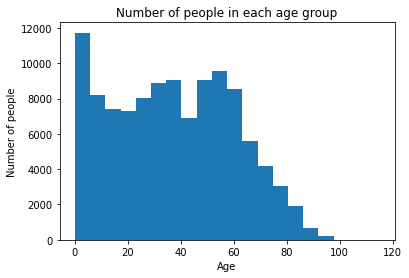

In [45]:
plt.hist(exploreData['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of people in each age group');

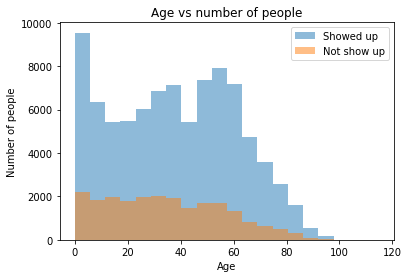

In [46]:
plt.hist(exploreData.Age[showUp], label='Showed up', bins=20, alpha=0.5)
plt.hist(exploreData.Age[noShowUp], label='Not show up', bins=20, alpha=0.5)
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age vs number of people');

In [47]:
ageShowUp = exploreData.groupby('Age').Show_up.mean()
ageShowUp = ageShowUp.to_frame('ShowUp')

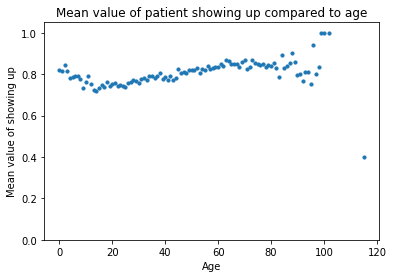

In [48]:
plt.scatter(y=ageShowUp['ShowUp'], x=ageShowUp.index, s=10)
plt.ylim(0,1.05)
plt.xlabel('Age')
plt.ylabel('Mean value of showing up')
plt.title('Mean value of patient showing up compared to age');

In [49]:
print('Percent of people who did not show up: {:.2f}%'.format(exploreData.query('Show_up == 0').shape[0]/exploreData.shape[0]*100))
print('Percent of people who did show up: {:.2f}%'.format(exploreData.query('Show_up == 1').shape[0]/exploreData.shape[0]*100))

Percent of people who did not show up: 20.19%
Percent of people who did show up: 79.81%


In [50]:
print('Percent of people who did not have a scholarship and did not show up: {:.2f}%'.format(len(exploreData[(exploreData["Scholarship"] == 0) & (exploreData["Show_up"] == 0)])/(len(exploreData[(exploreData["Scholarship"] == 0) & (exploreData["Show_up"] == 0)])+len(exploreData[(exploreData["Scholarship"] == 0) & (exploreData["Show_up"] == 1)]))*100))


Percent of people who did not have a scholarship and did not show up: 19.80%


In [51]:
print('Percent of people who had a scholarship and did not show up: {:.2f}%'.format(len(exploreData[(exploreData["Scholarship"] == 1) & (exploreData["Show_up"] == 0)])/(len(exploreData[(exploreData["Scholarship"] == 1) & (exploreData["Show_up"] == 0)])+len(exploreData[(exploreData["Scholarship"] == 1) & (exploreData["Show_up"] == 1)]))*100))


Percent of people who had a scholarship and did not show up: 23.77%


In [52]:
print('Percent of people who received an SMS and did not show up: {:.2f}%'.format(len(exploreData[(exploreData["SMS_received"] == 1) & (exploreData["Show_up"] == 0)])/(len(exploreData[(exploreData["SMS_received"] == 1) & (exploreData["Show_up"] == 0)])+len(exploreData[(exploreData["SMS_received"] == 1) & (exploreData["Show_up"] == 1)]))*100))


Percent of people who received an SMS and did not show up: 27.59%


In [53]:
print('Percent of people who did not receive an SMS and did not show up: {:.2f}%'.format(len(exploreData[(exploreData["SMS_received"] == 0) & (exploreData["Show_up"] == 0)])/(len(exploreData[(exploreData["SMS_received"] == 0) & (exploreData["Show_up"] == 0)])+len(exploreData[(exploreData["SMS_received"] == 0) & (exploreData["Show_up"] == 1)]))*100))


Percent of people who did not receive an SMS and did not show up: 16.69%
